# 13-1 엑셀 파일을 읽고 쓰기

## 엑셀 파일의 데이터 읽기

In [7]:
# df = pd.read_excel('excel_file.xlsx'[,sheet_name=number 혹은 '시트이름', index_col=number 혹은 '열이름'])
import pandas as pd
df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/학생시험성적.xlsx')
df

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


In [8]:
pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/학생시험성적.xlsx', sheet_name=1)

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


In [10]:
pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/학생시험성적.xlsx', sheet_name='2차시험')

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


In [11]:
df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/학생시험성적.xlsx', sheet_name='2차시험', index_col=0)
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


In [12]:
df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/학생시험성적.xlsx', sheet_name='2차시험', index_col='학생')
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


## 데이터를 엑셀 파일로 쓰기

In [20]:
import pandas as pd
import xlsxwriter

excel_exam_data1 = {'학생':['A','B','C','D','E','F'],
                   '국어':[80,90,95,70,75,85],
                   '영어':[90,95,70,85,90,95],
                   '수학':[85,95,75,80,85,100]}
df1 =pd.DataFrame(excel_exam_data1, columns=['학생','국어','영어','수학'])
df1

,학생,국어,영어,수학
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85
5,F,85,95,100


In [23]:
excel_writer = pd.ExcelWriter('D:/Python_Project/python_beginner/학생시험성적2.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer, index=False)
excel_writer.save()

In [24]:
excel_writer2 = pd.ExcelWriter('D:/Python_Project/python_beginner/학생시험성적3.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer2, index=False, sheet_name ='중간고사')
excel_writer2.save()

In [26]:
import pandas as pd

excel_exam_data2 ={'학생':['A','B','C','D','E','F'],
                  '국어':[85,95,75,80,85,100],
                  '영어':[80,90,95,70,75,85],
                  '수학':[90,95,70,85,90,95]}

df2 = pd.DataFrame(excel_exam_data2, columns=['학생','국어','영어','수학'])
df2

,학생,국어,영어,수학
0,A,85,80,90
1,B,95,90,95
2,C,75,95,70
3,D,80,70,85
4,E,85,75,90
5,F,100,85,95


In [27]:
excel_writer3 = pd.ExcelWriter('D:/Python_Project/python_beginner/학생시험성적4.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer3, index=False, sheet_name='중간고사')
df1.to_excel(excel_writer3, index=False, sheet_name='기말고사')
excel_writer3.save()

# 13-2 엑셀 파일 통합하기

## 효율적인 데이터 처리를 위한 엑셀 데이터 구조
### 여러개의 엑셀 파일 데이터를 통합하기



#### 주의 사항
##### 1.열의 머리글은 한줄로만 만들고 데이터는 그 아래에 입력한다. 
##### 2.열 머리글이나 데이터 입력 부분에 셀 병합 기능은 이용하지 않는다. 
##### 3. 데이터를 입력할 때 하나의 셀에 숫자와 단위를 같이 쓰지않는다. 
##### 하나의 열에 입력한 값의 데이터 형식은 모두 일치해야 한다. 즉 하나의 열에 문자열, 숫자, 날짜등은 혼합해서 쓰지 않는다. 
##### 4.데이터를 연도, 분기, 월, 업체명, 제품명 등의 시트로 나누지 않는다. 즉 가능하면 모든 데이터를 하나의 시트에 다 넣는다. 

In [31]:
excel_data_files=['D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원.xlsx',
                 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Becky사원.xlsx',
                  'D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Chris사원.xlsx']

In [32]:
total_data =pd.DataFrame()

In [33]:
import pandas as pd

for f in excel_data_files:
    df=pd.read_excel(f)
    total_data=total_data.append(df)
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
0,시계,B,나,154,108,155,114
1,구두,B,나,200,223,213,202
2,핸드백,B,나,350,340,377,392
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


In [34]:
import pandas as pd

total_data = pd.DataFrame()

for f in excel_data_files:
    df=pd.read_excel(f)
    total_data =total_data.append(df, ignore_index=True) #기존 인덱스 무시
    
total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [35]:
# glob() 지정된 문자열에 대응되는 모든 파일과 디렉토리의 리스트를 반환
# * 는 길이와 상관없이 모든 문자열을 ? 는 한글자로 된 모든 문자열을 의미
import glob
glob.glob('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_*사원.xlsx')

['D:/Python_Project/python_beginner/python-for-data-analysis-master/data\\담당자별_판매량_Andy사원.xlsx',
 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data\\담당자별_판매량_Becky사원.xlsx',
 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data\\담당자별_판매량_Chris사원.xlsx']

In [36]:
import glob
import pandas as pd

excel_data_files1 = glob.glob('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_*사원.xlsx')
total_data1 = pd.DataFrame()

for f in excel_data_files1:
    df = pd.read_excel(f)
    total_data1 = total_data1.append(df, ignore_index=True)
    
total_data1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


### 통합 결과를 엑셀 파일로 저장하기

In [39]:
import glob
import pandas as pd

excel_file_name = 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_통합.xlsx'

excel_total_file_writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
total_data1.to_excel(excel_total_file_writer, index=False, sheet_name='담당자별_판매량_통합')
excel_total_file_writer.save()

glob.glob(excel_file_name)

['D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_통합.xlsx']

# 13-3 엑셀 파일로 읽어온 데이터 다루기

## 데이터를 추가하고 변경하기

In [42]:
import pandas as pd

df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


In [43]:
# df.loc[index_name, columns_name] = value
df.loc[2,'4분기'] =0
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,0


In [44]:
df.loc[3,'제품명'] ='벨트'
df.loc[3,'담당자'] ='A'
df.loc[3,'지역'] ='가'
df.loc[3,'1분기'] =100
df.loc[3,'1분기'] =150
df.loc[3,'1분기'] =200
df.loc[3,'1분기'] =250

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198.0,123.0,120.0,137.0
1,구두,A,가,273.0,241.0,296.0,217.0
2,핸드백,A,가,385.0,316.0,355.0,0.0
3,벨트,A,가,250.0,NaN,NaN,NaN


In [45]:
# 만약 특정열의 데이터 값 전체를 변경하려면 df[columns_name]=value
df['담당자'] ='Andy'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Andy,가,198.0,123.0,120.0,137.0
1,구두,Andy,가,273.0,241.0,296.0,217.0
2,핸드백,Andy,가,385.0,316.0,355.0,0.0
3,벨트,Andy,가,250.0,NaN,NaN,NaN


In [48]:
excel_file_name='D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원_new.xlsx'

new_excel_file = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
df.to_excel(new_excel_file, index=False)
new_excel_file.save()

glob.glob(excel_file_name)

['D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원_new.xlsx']

## 여러개의 엑셀 파일에서 데이터 수정하기

In [104]:
#정규표현식을 위한 모듈
import re 

file_name='D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원.xlsx'
# re.sub(patter, repl, string)
# file_name(string)에서 패턴(.xlsx)을 찾아서 대체문자열(2.xlsx)로 변경함으로써 지정된 파일명을 새로운 파일명으로 변경
new_file_name = re.sub(".xlsx",'2.xlsx',file_name)
new_file_name

'D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원2.xlsx'

In [52]:
import glob
import re 
import pandas as pd

#원하는 문자열이 포함된 파일을 검색해 리스트를 할당한다. 
excel_data_file1 = glob.glob('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_*사원.xlsx')

#리스트에 있는 엑셀 파일만큼 반복 수행한다. 
for f in excel_data_file1:
    #엑셀 파일에서 DataFrame 형식으로 데이터를 가져온다. 
    df = pd.read_excel(f)
    
    #특정 열의값을 변경한다. 
    if(df.loc[1,'담당자']=='A'):
        df['담당자']='Andy'
    elif(df.loc[1,'담당자']=='B'):
        df['담당자']='Backy'
    elif(df.loc[1,'담당자']=='C'):
        df['담당자']='Chris'
        
    #엑셀 파일 이름에서 지정된 문자열 패턴을 찾아서 파일명을 변경한다. 
    f_new = re.sub('.xlsx', '2.xlsx',f)
    print(f_new)
    
    #수정된 데이터를 새로운 이름의 엑셀 파일로 저장한다. 
    new_excel_file = pd.ExcelWriter(f_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()

D:/Python_Project/python_beginner/python-for-data-analysis-master/data\담당자별_판매량_Andy사원2.xlsx
D:/Python_Project/python_beginner/python-for-data-analysis-master/data\담당자별_판매량_Becky사원2.xlsx
D:/Python_Project/python_beginner/python-for-data-analysis-master/data\담당자별_판매량_Chris사원2.xlsx


In [53]:
glob.glob('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_*사원?.xlsx')

['D:/Python_Project/python_beginner/python-for-data-analysis-master/data\\담당자별_판매량_Andy사원2.xlsx',
 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data\\담당자별_판매량_Becky사원2.xlsx',
 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data\\담당자별_판매량_Chris사원2.xlsx']

## 엑셀의 필터 기능 수행하기

In [55]:
import pandas as pd

df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_통합.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [56]:
df['제품명']

0     시계
1     구두
2    핸드백
3     시계
4     구두
5    핸드백
6     시계
7     구두
8    핸드백
Name: 제품명, dtype: object

In [57]:
# 비교 연산자 중 ==f 로 문자열이 있는지 검사
df['제품명']=='핸드백'

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: 제품명, dtype: bool

In [58]:
handbag = df[df['제품명']=='핸드백']
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [59]:
import pandas as pd

df= pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_통합.xlsx')
# DataFrame_data.isin(value) => 문자열 찾는 또다른 방법
handbag1 = df[df['제품명'].isin(['핸드백'])]
handbag1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [60]:
# | => or
df[(df['제품명']=='구두')|(df['제품명']=='핸드백')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [62]:
df[df['제품명'].isin(['구두','핸드백'])]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


## 조건을 설정해 원하는 행만 선택하기

In [65]:
df[(df['3분기'] >= 250)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [66]:
df[(df['제품명']=='핸드백')&(df['3분기']>=350)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392


## 원하는 열만 선택하기

In [68]:
import pandas as pd

df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


In [69]:
# 특정열만 선택하려면 원하는 열의header를 리스트 형식으로 지정
df[['제품명','1분기','2분기','3분기','4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


In [70]:
# DataFrame_data.iloc[row_num, col_num] 
#=> 행과 열의 위치를 숫자로 지정해서 원하는 위치의 데이터만 선택하는 방법
df.iloc[:,[0,3,4,5,6]]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


In [71]:
df.iloc[[0,2],:]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
2,핸드백,A,가,385,316,355,331


## 엑셀 데이터 계산하기

In [73]:
import pandas as pd

df=pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_통합.xlsx')

handbag = df[(df['제품명']=='핸드백')]
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [74]:
# DataFrame_data.sum([axis=0(기본) or 1]) => 0이면 열방향, 1이면 행방향
handbag.sum(axis=1)

2    1387
5    1459
8    1379
dtype: int64

In [76]:
handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns=['연간판매량'])
handbag_sum

,연간판매량
2,1387
5,1459
8,1379


In [77]:
handbag_total = handbag.join(handbag_sum)
handbag_total

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379


In [78]:
# DataFrame_data.sort_value(by [,axis=0(기본) or 1, ascending=True(기본) or False])
# ascending=True는 오름차순으로 정렬 (작은것부터 보여준다)
handbag_total.sort_values(by='연간판매량', ascending=True)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
8,핸드백,C,다,365,383,308,323,1379
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459


In [79]:
handbag_total.sort_values(by='연간판매량', ascending=False)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379


### 열 데이터의 합계 구하기

In [81]:
handbag_total.sum()

제품명      핸드백핸드백핸드백
담당자            ABC
지역             가나다
1분기           1100
2분기           1039
3분기           1040
4분기           1046
연간판매량         4225
dtype: object

In [82]:
handbag_sum2=pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_sum2

,합계
제품명,핸드백핸드백핸드백
담당자,ABC
지역,가나다
1분기,1100
2분기,1039
3분기,1040
4분기,1046
연간판매량,4225


In [83]:
# T는 행과 열을 바꾸는 것
handbag_total2 = handbag_total.append(handbag_sum2.T)
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백핸드백핸드백,ABC,가나다,1100,1039,1040,1046,4225


In [85]:
import pandas as pd

#엑셀 파일을 pandas 의 DataFrame 형식으로 읽어 온다. 
df = pd.read_excel('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/담당자별_판매량_통합.xlsx')

#제품명 열에서 핸드백이 있는 행만 선택한다. 
product_name = '핸드백'
handbag =df[(df['제품명']==product_name)]

#행별로 합계를 구하고 마지막 열 다음에 추가한다. 
handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns=['연간판매량'])
handbag_total = handbag.join(handbag_sum)

#열별로 합해 분기별 합계와 연감 판매량 합계를 구하고 마지막 행 다음에 추가한다.
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_total2 = handbag_total.append(handbag_sum2.T)

#지정된 항목의 문자열을 변경한다. 
handbag_total2.loc['합계', '제품명'] = product_name
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역'] = '전체'

#결과를 확인한다.
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


# 13-4 엑셀 데이터의 시각화
## 그래프를 엑셀 파일에 넣기

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

sales = {'시간':[9,10,11,12,13,14,15],
        '제품1':[10,15,12,11,12,14,13],
        '제품2':[9,11,14,12,13,10,12]}
df=pd.DataFrame(sales, index=sales['시간'],columns=['제품1','제품'])
df.index.name='시간' #index 라벨 추가

df

,제품1,제품
시간,,
9,10,NaN
10,15,NaN
11,12,NaN
12,11,NaN
13,12,NaN
14,14,NaN
15,13,NaN


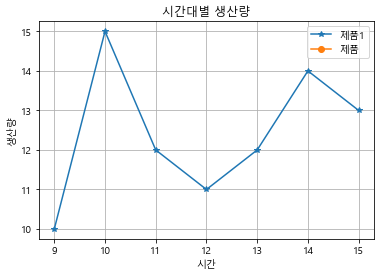

In [88]:
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

product_plot = df.plot(grid=True, style=['-*','-o'], title='시간대별 생산량')
product_plot.set_ylabel('생산량')

image_file = 'D:/Python_Project/python_beginner/python-for-data-analysis-master/fig_for_excel1.png' #이미지 파일 경로 및 이름
plt.savefig(image_file, dpi=400) # 그래프를 이미지 파일로 저장

plt.show()

In [91]:
import pandas as pd

#(1) pandas의 ExcelWriter 객체 생성
excel_file = 'D:/Python_Project/python_beginner/python-for-data-analysis-master/data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

#(2) DataFrame데이터를 지정된 엑셀시트 (Sheet) 쓰기
df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

#(3) ExcelWriter 객체에서 워크시트(worksheet) 객체 생성
worksheet = excel_writer.sheets['Sheet1']

#(4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', image_file,{'x_scale':0.7, 'y_sclae':0.7})
#worksheet.imsert_image(1,3,image_file, {'x_scale':0.7, 'y_scale':0.7})

#(5) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_writer.save()

## 엑셀 차트 만들기

In [96]:
# (1)pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/data_chart_in_excel.xlsx', engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트 (sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

#(3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet)객체 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

#(4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type':'line'})

#(5) 차트 생성을 윟ㄴ 데이터값의 범위 지정
chart.add_series({'values':'Sheet1!$B$2:$B$8'})
chart.add_series({'values':'Sheet1!$B$2:$C$8'})

#(6) 워크 시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2',chart)

#(7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

In [98]:
# (5)차트 생성을 위한 데이터값의 범위 지정
chart.add_series({'values':'=Sheet1!$B$2:$B$8',
                 'categories':'Sheet1!$A$2:$A$8',
                 'name':'Sheet1!$B$1',})
chart.add_series({'values':'=Sheet1!$C$2:$C$8',
                 'categories':'Sheet1!$A$2:$A$8',
                 'name':'Sheet1!$C$1',})

In [99]:
#(5-1) 엑셀 차트에 x,y 축 라벨과 제목 생성하기
chart.set_title({'name':'시간대별 생산량'})
chart.set_x_axis({'name':'시간'})
chart.set_y_axis({'name':'생산량'})

In [102]:
#(1) pandas 의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('D:/Python_Project/python_beginner/python-for-data-analysis-master/data/data_chart_in_excel2.xlsx', engine='xlsxwriter')

#(2) DataFrame 데이터를 지정된 엑셀 시트(sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

#(3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook = excel_chart.book
worksheet=excel_chart.sheets['Sheet1']

#(4) 차트 객체 생성 (원하는 차트의 종류 지정)
chart =workbook.add_chart({'type':'line'})

#(5) 차트 생성을 위한 데이터 값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1'})

#(5-1) 엑셀 차트에 x,y축 라벨과 제목 추가
chart.set_title({'name':'시간대별 생산량'})
chart.set_x_axis({'name':'시간'})
chart.set_y_axis({'name':'생산량'})

#(6) 워크시트에 차트가 들어갈 위치를 지정해 차트에 넣기
worksheet.insert_chart('D2',chart)

#(7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()